This file was compiled to give the supervisor ease of access the results without having to go through the mess of the notebook used to generate the results. The notebook mentioned is miscellaneous/attempt2.ipynb. 

In [1]:
# get path from .env file
import os
from dotenv import dotenv_values
import pandas as pd
import numpy as np
config = dotenv_values(".env")
data_dir = config["DATA_DIR"]
working_dir = config["WORKING_DIR"]
from hsi_datagen import HSI_datagen
from all_models import build_HS_CNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# show all the folders and files in the working directory in a tree structure
os.chdir(data_dir)
os.listdir(data_dir)

['annotations', 'Avocado', 'Kaki', 'Kiwi', 'Mango', 'Papaya']

## Confusion Matrices for the "Replicating Results" Section of the Technical Implementation
- loads data from csv files
- creates data generators for testing
- loads the model
- evaluates the model on the test data

In [2]:
train_df = pd.read_csv(os.path.join(working_dir, "train_df.csv"))
val_df = pd.read_csv(os.path.join(working_dir, "val_df.csv"))
test_df = pd.read_csv(os.path.join(working_dir, "test_df.csv"))

recall ripeness mapping

In [3]:
ripeness_state_dict = {'unripe': 0, 'perfect': 1, 'overripe': 2}

define augmentation parameters

In [4]:
augConfig = {"keep_original": False, "horizontal_flip": False, "vertical_flip" : True,"rotation_range": 90, "noise":{"type":"poisson","level":0} }

### Avocado Subset 

#### VIS

In [5]:
# get all rows where the camera type is VIS and the fruit is Avocado
test_avocado_VIS = test_df[(test_df['camera_type'] == 'VIS') & (test_df['fruit'] == 'Avocado')]
# create datagen
test_avocado_VIS_datagen = HSI_datagen(test_avocado_VIS, 'header_file', 'data_file', {'name': 'ripeness_state_y', 'type': int}, batch_size=len(test_avocado_VIS), target_size=(64, 64), data_dir=data_dir,
                            shuffle=False, normalize=False)

In [6]:
# create model 
avocado_vis_model = build_HS_CNN((64,64,224))

3/3 [==============================] - 8s 39ms/step
Epoch 5 Accuracy: 0.37349397590361444
              precision    recall  f1-score   support

      unripe       0.06      0.13      0.08        15
     perfect       0.60      0.71      0.65        41
    overripe       0.00      0.00      0.00        27

    accuracy                           0.37        83
   macro avg       0.22      0.28      0.24        83
weighted avg       0.31      0.37      0.34        83



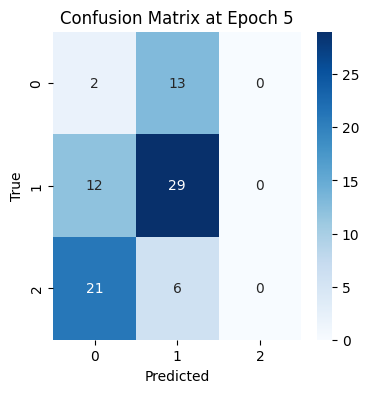

3/3 [==============================] - 1s 97ms/step
Epoch 10 Accuracy: 0.5903614457831325
              precision    recall  f1-score   support

      unripe       0.42      0.87      0.57        15
     perfect       0.86      0.29      0.44        41
    overripe       0.63      0.89      0.74        27

    accuracy                           0.59        83
   macro avg       0.64      0.68      0.58        83
weighted avg       0.70      0.59      0.56        83



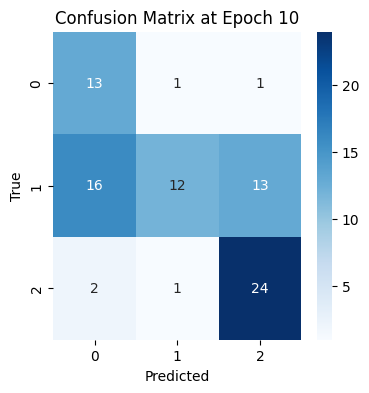

3/3 [==============================] - 0s 41ms/step
Epoch 15 Accuracy: 0.6144578313253012
              precision    recall  f1-score   support

      unripe       0.57      0.87      0.68        15
     perfect       0.59      0.78      0.67        41
    overripe       1.00      0.22      0.36        27

    accuracy                           0.61        83
   macro avg       0.72      0.62      0.57        83
weighted avg       0.72      0.61      0.57        83



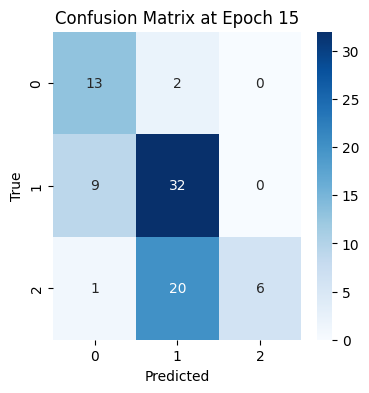

3/3 [==============================] - 0s 41ms/step
Epoch 20 Accuracy: 0.6024096385542169
              precision    recall  f1-score   support

      unripe       0.76      0.87      0.81        15
     perfect       0.56      0.90      0.69        41
    overripe       0.00      0.00      0.00        27

    accuracy                           0.60        83
   macro avg       0.44      0.59      0.50        83
weighted avg       0.42      0.60      0.49        83



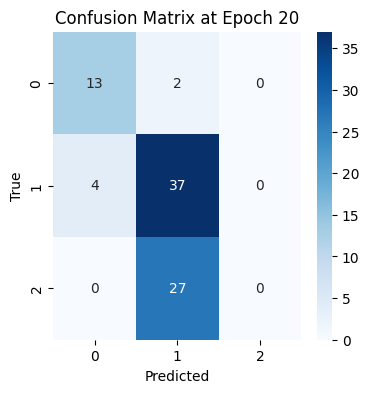

3/3 [==============================] - 0s 39ms/step
Epoch 25 Accuracy: 0.7469879518072289
              precision    recall  f1-score   support

      unripe       0.62      0.87      0.72        15
     perfect       0.80      0.68      0.74        41
    overripe       0.78      0.78      0.78        27

    accuracy                           0.75        83
   macro avg       0.73      0.78      0.75        83
weighted avg       0.76      0.75      0.75        83



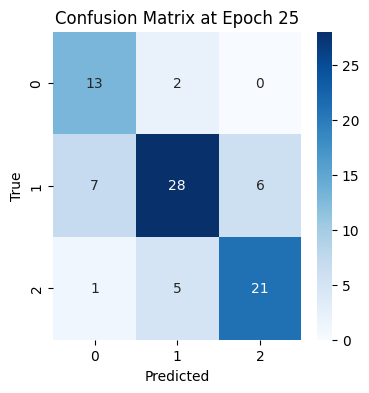

3/3 [==============================] - 0s 39ms/step
Epoch 30 Accuracy: 0.6987951807228916
              precision    recall  f1-score   support

      unripe       0.76      0.87      0.81        15
     perfect       0.91      0.49      0.63        41
    overripe       0.57      0.93      0.70        27

    accuracy                           0.70        83
   macro avg       0.75      0.76      0.72        83
weighted avg       0.77      0.70      0.69        83



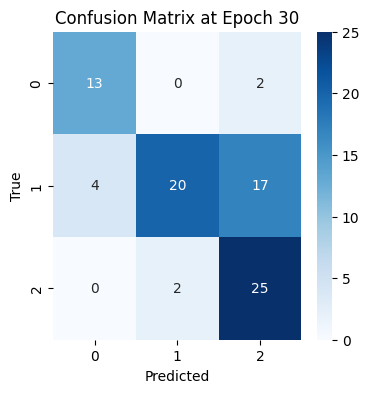

3/3 [==============================] - 0s 35ms/step
Epoch 35 Accuracy: 0.8554216867469879
              precision    recall  f1-score   support

      unripe       1.00      0.80      0.89        15
     perfect       0.87      0.83      0.85        41
    overripe       0.78      0.93      0.85        27

    accuracy                           0.86        83
   macro avg       0.88      0.85      0.86        83
weighted avg       0.87      0.86      0.86        83



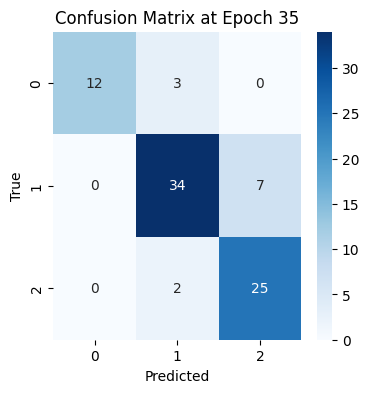

3/3 [==============================] - 0s 36ms/step
Epoch 40 Accuracy: 0.8554216867469879
              precision    recall  f1-score   support

      unripe       1.00      0.80      0.89        15
     perfect       0.92      0.80      0.86        41
    overripe       0.74      0.96      0.84        27

    accuracy                           0.86        83
   macro avg       0.89      0.86      0.86        83
weighted avg       0.88      0.86      0.86        83



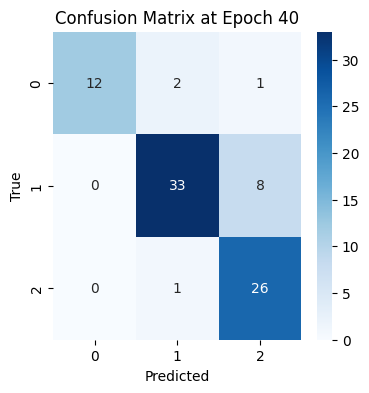

3/3 [==============================] - 0s 50ms/step
Epoch 45 Accuracy: 0.7349397590361446
              precision    recall  f1-score   support

      unripe       0.59      0.87      0.70        15
     perfect       0.79      0.63      0.70        41
    overripe       0.79      0.81      0.80        27

    accuracy                           0.73        83
   macro avg       0.72      0.77      0.74        83
weighted avg       0.75      0.73      0.73        83



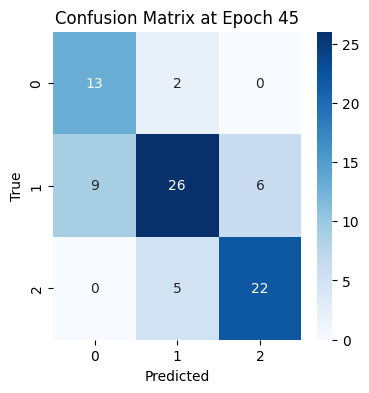

3/3 [==============================] - 0s 45ms/step
Epoch 50 Accuracy: 0.37349397590361444
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00        15
     perfect       0.31      0.10      0.15        41
    overripe       0.39      1.00      0.56        27

    accuracy                           0.37        83
   macro avg       0.23      0.37      0.23        83
weighted avg       0.28      0.37      0.25        83



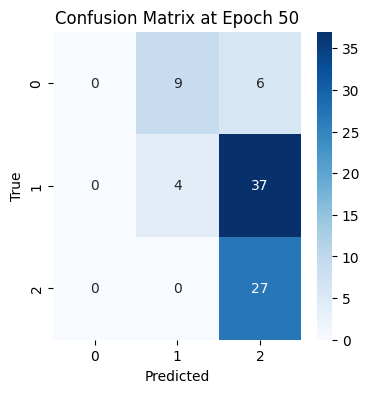

3/3 [==============================] - 0s 41ms/step
Epoch 5 Accuracy: 0.6144578313253012
              precision    recall  f1-score   support

      unripe       1.00      0.73      0.85        15
     perfect       0.82      0.34      0.48        41
    overripe       0.47      0.96      0.63        27

    accuracy                           0.61        83
   macro avg       0.77      0.68      0.65        83
weighted avg       0.74      0.61      0.60        83



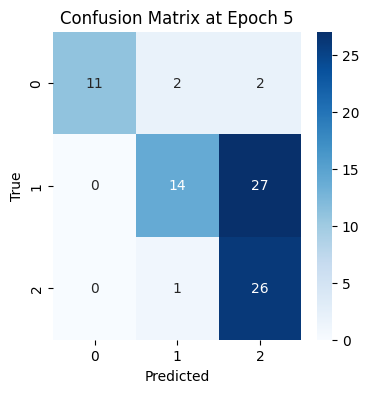

3/3 [==============================] - 0s 70ms/step
Epoch 10 Accuracy: 0.5542168674698795
              precision    recall  f1-score   support

      unripe       1.00      0.80      0.89        15
     perfect       0.88      0.17      0.29        41
    overripe       0.43      1.00      0.60        27

    accuracy                           0.55        83
   macro avg       0.77      0.66      0.59        83
weighted avg       0.75      0.55      0.50        83



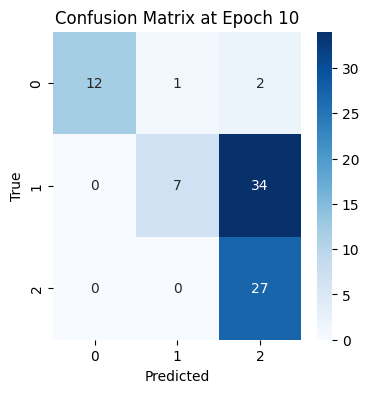

3/3 [==============================] - 0s 44ms/step
Epoch 15 Accuracy: 0.5421686746987951
              precision    recall  f1-score   support

      unripe       0.68      0.87      0.76        15
     perfect       0.86      0.15      0.25        41
    overripe       0.46      0.96      0.62        27

    accuracy                           0.54        83
   macro avg       0.67      0.66      0.54        83
weighted avg       0.70      0.54      0.46        83



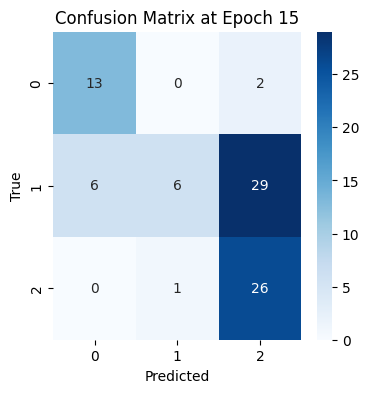

3/3 [==============================] - 0s 38ms/step
Epoch 20 Accuracy: 0.4939759036144578
              precision    recall  f1-score   support

      unripe       0.32      0.87      0.46        15
     perfect       0.71      0.12      0.21        41
    overripe       0.66      0.85      0.74        27

    accuracy                           0.49        83
   macro avg       0.56      0.61      0.47        83
weighted avg       0.62      0.49      0.43        83



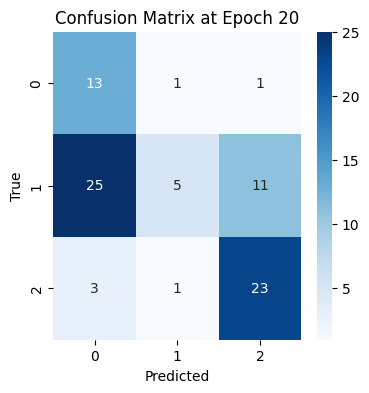

3/3 [==============================] - 0s 38ms/step
Epoch 25 Accuracy: 0.5060240963855421
              precision    recall  f1-score   support

      unripe       0.42      0.87      0.57        15
     perfect       0.83      0.12      0.21        41
    overripe       0.52      0.89      0.66        27

    accuracy                           0.51        83
   macro avg       0.59      0.63      0.48        83
weighted avg       0.66      0.51      0.42        83



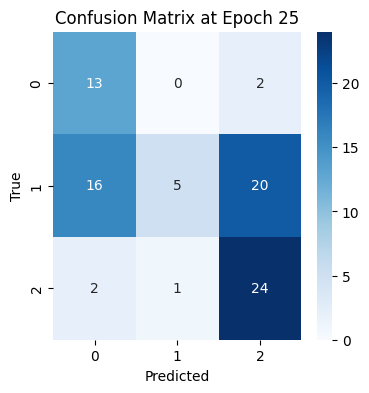

3/3 [==============================] - 0s 38ms/step
Epoch 30 Accuracy: 0.5301204819277109
              precision    recall  f1-score   support

      unripe       0.76      0.87      0.81        15
     perfect       0.83      0.12      0.21        41
    overripe       0.43      0.96      0.60        27

    accuracy                           0.53        83
   macro avg       0.68      0.65      0.54        83
weighted avg       0.69      0.53      0.45        83



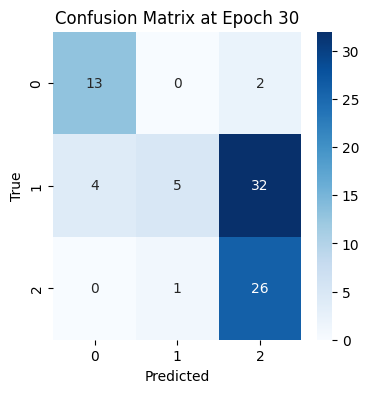

3/3 [==============================] - 0s 36ms/step
Epoch 35 Accuracy: 0.4457831325301205
              precision    recall  f1-score   support

      unripe       1.00      0.20      0.33        15
     perfect       0.41      0.17      0.24        41
    overripe       0.43      1.00      0.60        27

    accuracy                           0.45        83
   macro avg       0.61      0.46      0.39        83
weighted avg       0.52      0.45      0.37        83



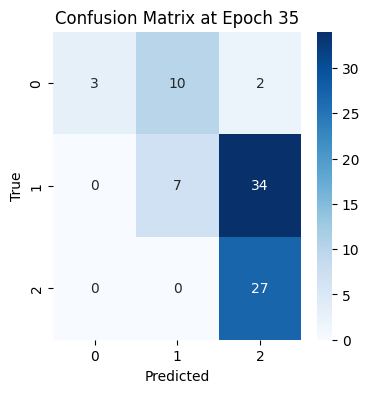

3/3 [==============================] - 0s 36ms/step
Epoch 40 Accuracy: 0.46987951807228917
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00        15
     perfect       0.48      0.32      0.38        41
    overripe       0.46      0.96      0.63        27

    accuracy                           0.47        83
   macro avg       0.32      0.43      0.34        83
weighted avg       0.39      0.47      0.39        83



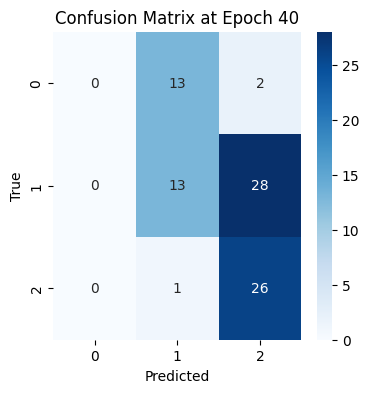

3/3 [==============================] - 0s 38ms/step
Epoch 45 Accuracy: 0.4578313253012048
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00        15
     perfect       0.46      0.29      0.36        41
    overripe       0.46      0.96      0.62        27

    accuracy                           0.46        83
   macro avg       0.31      0.42      0.33        83
weighted avg       0.38      0.46      0.38        83



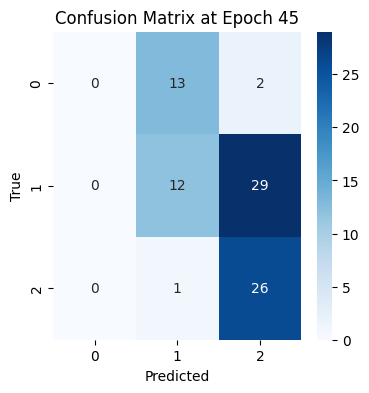

3/3 [==============================] - 0s 38ms/step
Epoch 50 Accuracy: 0.42168674698795183
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00        15
     perfect       0.39      0.22      0.28        41
    overripe       0.43      0.96      0.60        27

    accuracy                           0.42        83
   macro avg       0.27      0.39      0.29        83
weighted avg       0.33      0.42      0.33        83



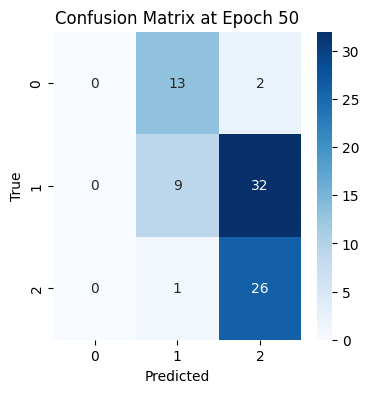

In [7]:
# results from first training session 
x, y = test_avocado_VIS_datagen.__getitem__(0)
y = y.numpy()
for i in range(5,51,5): 
    avocado_vis_model.load_weights(working_dir + 'AVOCADO_VIS_HS_CNN_checkpoints/HS_CNN' + str(i).zfill(4) + '.ckpt')
    # x, y = test_avocado_VIS_datagen.__getitem__(0)
    y_pred = avocado_vis_model.predict(x)
    y_pred = np.argmax(y_pred, axis=1)
    # y = y.numpy()
    print(f"Epoch {i} Accuracy: {np.mean(y_pred == y)}")
    # print recall and precision and f1 score 
    print(classification_report(y, y_pred, target_names=ripeness_state_dict.keys(), zero_division=0))
    # plot confusion matrix 
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix at Epoch {i}')
    plt.show()

# results from second training session
for i in range(5,51,5): 
    avocado_vis_model.load_weights(working_dir + 'AVOCADO_VIS_HS_CNN_checkpoints2/HS_CNN' + str(i).zfill(4) + '.ckpt')
    # x, y = test_avocado_VIS_datagen.__getitem__(0)
    y_pred = avocado_vis_model.predict(x)
    y_pred = np.argmax(y_pred, axis=1)
    # y = y.numpy()
    print(f"Epoch {i} Accuracy: {np.mean(y_pred == y)}")
    # print recall and precision and f1 score 
    print(classification_report(y, y_pred, target_names=ripeness_state_dict.keys(), zero_division=0))
    # plot confusion matrix 
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix at Epoch {i}')
    plt.show()


#### NIR

In [9]:
test_avocado_NIR = test_df[(test_df['camera_type'] == 'NIR') & (test_df['fruit'] == 'Avocado')]
# note: batch size reflects test set size 
test_avocado_NIR_datagen = HSI_datagen(test_avocado_NIR, 'header_file', 'data_file', {'name': 'ripeness_state_y', 'type': int}, batch_size=len(test_avocado_NIR), target_size=(64, 64), data_dir=data_dir,
                            shuffle=True, normalize=False)

In [8]:
avocado_nir_model = build_HS_CNN((64,64,252))

1/1 [==============================] - 0s 46ms/step
Epoch 3 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



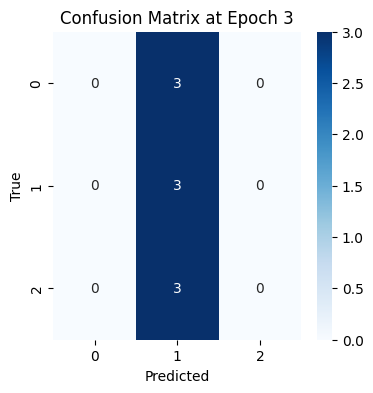

1/1 [==============================] - 0s 40ms/step
Epoch 8 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



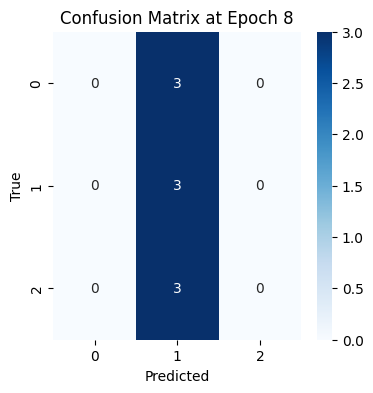

1/1 [==============================] - 0s 42ms/step
Epoch 13 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



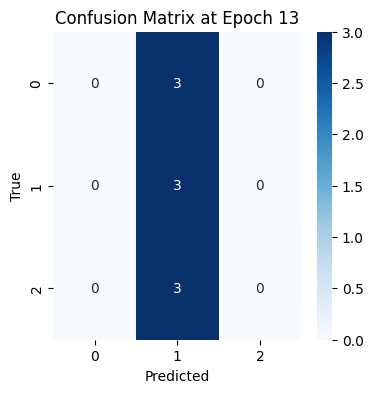

1/1 [==============================] - 0s 42ms/step
Epoch 18 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.38      1.00      0.55         3
     perfect       1.00      0.33      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.46      0.44      0.35         9
weighted avg       0.46      0.44      0.35         9



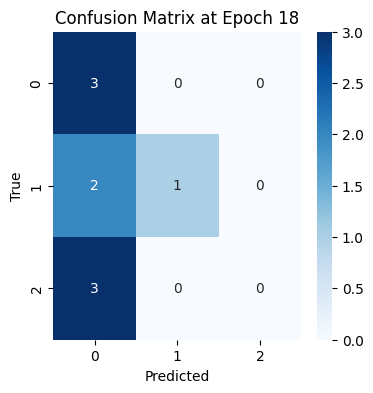

1/1 [==============================] - 0s 42ms/step
Epoch 23 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



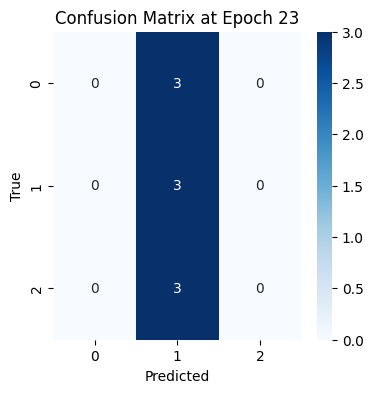

1/1 [==============================] - 0s 48ms/step
Epoch 28 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



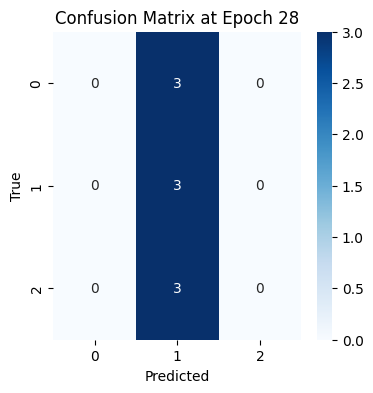

1/1 [==============================] - 0s 41ms/step
Epoch 33 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



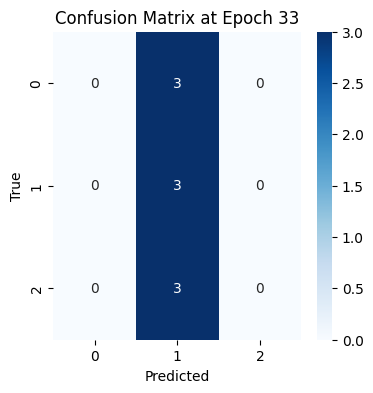

1/1 [==============================] - 0s 43ms/step
Epoch 38 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



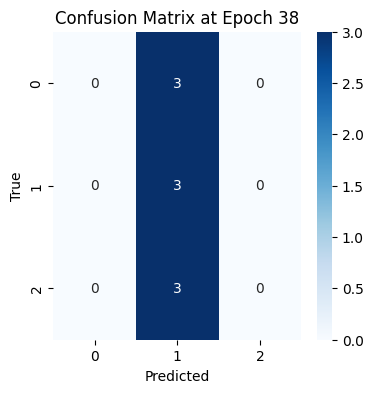

1/1 [==============================] - 0s 41ms/step
Epoch 43 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



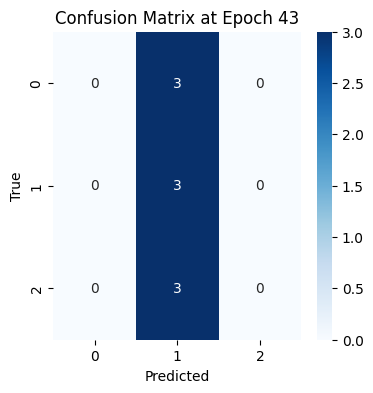

1/1 [==============================] - 0s 41ms/step
Epoch 48 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



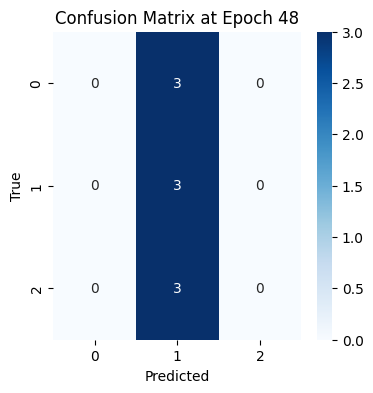

1/1 [==============================] - 0s 41ms/step
Epoch 53 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



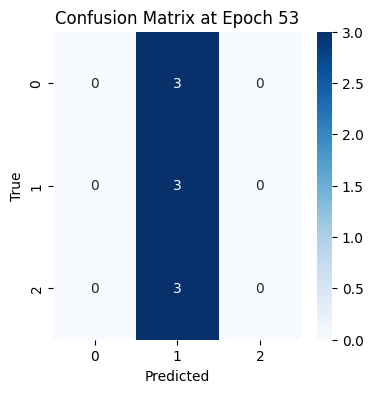

1/1 [==============================] - 0s 42ms/step
Epoch 58 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      1.00      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



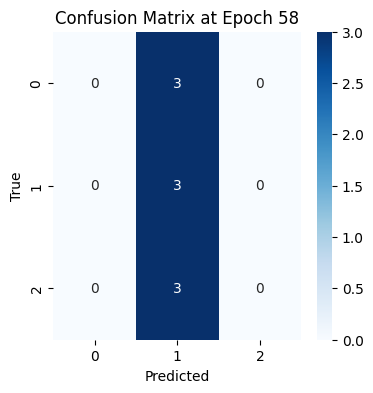

1/1 [==============================] - 0s 61ms/step
Epoch 63 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.38      1.00      0.55         3
     perfect       1.00      0.33      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.46      0.44      0.35         9
weighted avg       0.46      0.44      0.35         9



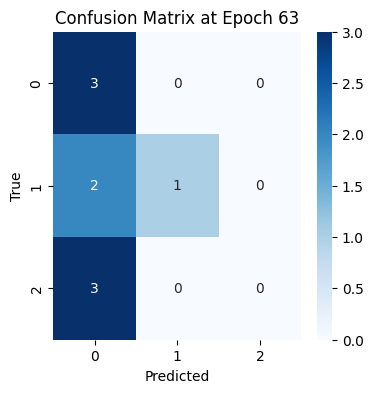

1/1 [==============================] - 0s 43ms/step
Epoch 68 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.38      1.00      0.55         3
     perfect       1.00      0.33      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.46      0.44      0.35         9
weighted avg       0.46      0.44      0.35         9



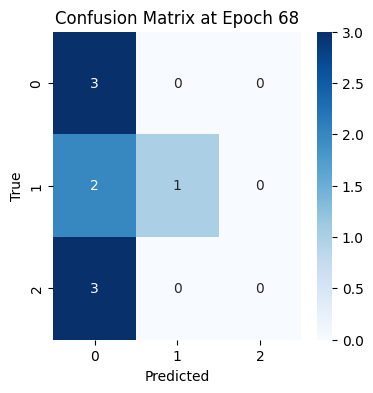

1/1 [==============================] - 0s 44ms/step
Epoch 73 Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

      unripe       0.50      0.67      0.57         3
     perfect       0.67      0.67      0.67         3
    overripe       1.00      0.67      0.80         3

    accuracy                           0.67         9
   macro avg       0.72      0.67      0.68         9
weighted avg       0.72      0.67      0.68         9



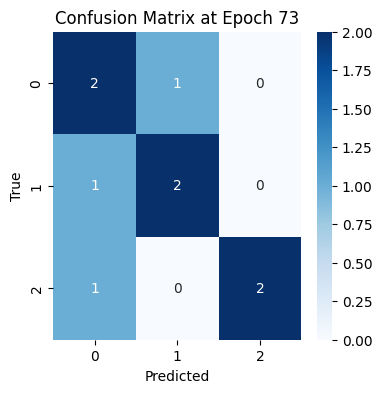

1/1 [==============================] - 0s 42ms/step
Epoch 78 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.50      0.67      0.57         3
     perfect       0.40      0.67      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.30      0.44      0.36         9
weighted avg       0.30      0.44      0.36         9



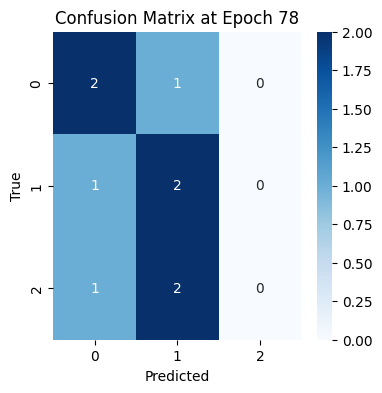

1/1 [==============================] - 0s 43ms/step
Epoch 83 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.38      1.00      0.55         3
     perfect       1.00      0.33      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.46      0.44      0.35         9
weighted avg       0.46      0.44      0.35         9



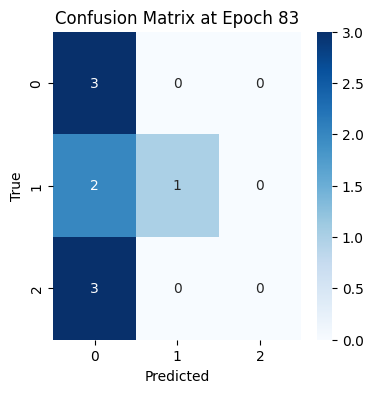

1/1 [==============================] - 0s 45ms/step
Epoch 88 Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

      unripe       0.60      1.00      0.75         3
     perfect       0.50      0.67      0.57         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.56         9
   macro avg       0.37      0.56      0.44         9
weighted avg       0.37      0.56      0.44         9



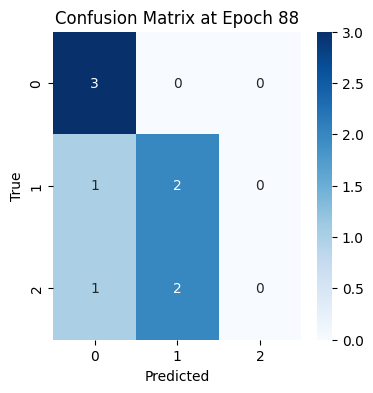

1/1 [==============================] - 0s 42ms/step
Epoch 93 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.33      0.67      0.44         3
    overripe       0.67      0.67      0.67         3

    accuracy                           0.44         9
   macro avg       0.33      0.44      0.37         9
weighted avg       0.33      0.44      0.37         9



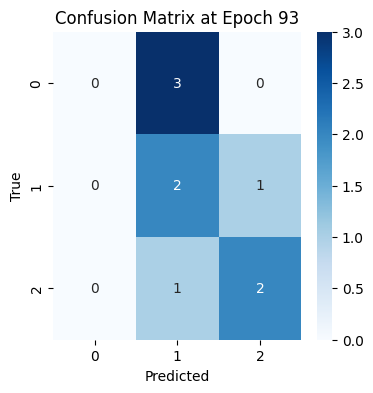

1/1 [==============================] - 0s 48ms/step
Epoch 98 Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

      unripe       0.60      1.00      0.75         3
     perfect       1.00      0.67      0.80         3
    overripe       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.78         9
weighted avg       0.87      0.78      0.78         9



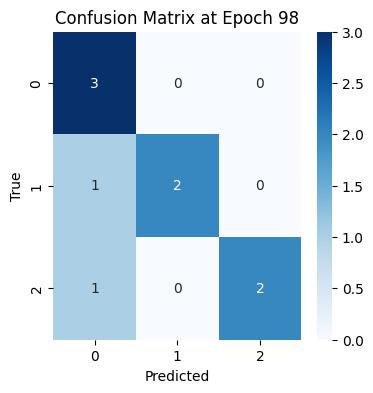

In [13]:
# results from first training session 
x, y = test_avocado_NIR_datagen.__getitem__(0)    
y = y.numpy()
for i in range(3,101,5): 
    avocado_nir_model.load_weights(working_dir + 'AVOCADO_NIR_HS_CNN_checkpoints_prev2/HS_CNN' + str(i).zfill(4) + '.ckpt')
    y_pred = avocado_nir_model.predict(x)
    y_pred = np.argmax(y_pred, axis=1)
    print(f"Epoch {i} Accuracy: {np.mean(y_pred == y)}")
    # print recall and precision and f1 score 
    print(classification_report(y, y_pred, target_names=ripeness_state_dict.keys(), zero_division=0))
    # plot confusion matrix 
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix at Epoch {i}')
    plt.show()


### Kiwi Subset

#### VIS 

In [14]:
# get all rows where the camera type is VIS and the fruit is Kiwi
test_kiwi_VIS = test_df[(test_df['camera_type'] == 'VIS') & (test_df['fruit'] == 'Kiwi')]

test_kiwi_VIS_datagen = HSI_datagen(test_kiwi_VIS, 'header_file', 'data_file', {'name': 'ripeness_state_y', 'type': int}, batch_size=len(test_kiwi_VIS), target_size=(64, 64), data_dir=data_dir,
                            shuffle=True, normalize=False)

In [16]:
kiwi_vis_model = build_HS_CNN((64, 64, 224))

1/1 [==============================] - 0s 237ms/step
Epoch 5 Accuracy: 0.5
              precision    recall  f1-score   support

      unripe       0.57      0.50      0.53         8
     perfect       0.00      0.00      0.00         8
    overripe       0.50      1.00      0.67         8

    accuracy                           0.50        24
   macro avg       0.36      0.50      0.40        24
weighted avg       0.36      0.50      0.40        24



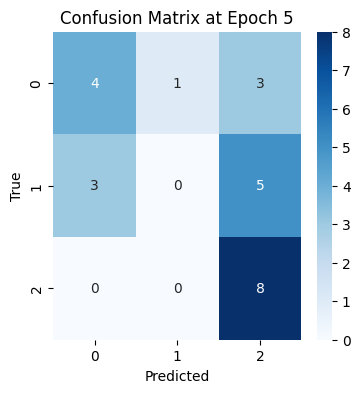

1/1 [==============================] - 0s 74ms/step
Epoch 10 Accuracy: 0.375
              precision    recall  f1-score   support

      unripe       0.50      0.25      0.33         8
     perfect       0.32      0.75      0.44         8
    overripe       1.00      0.12      0.22         8

    accuracy                           0.38        24
   macro avg       0.61      0.38      0.33        24
weighted avg       0.61      0.38      0.33        24



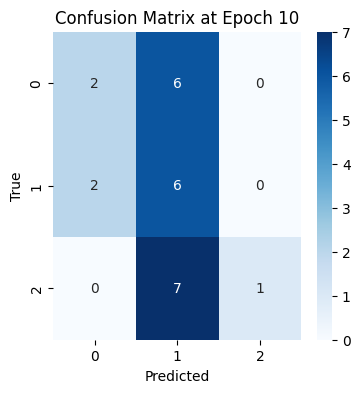

1/1 [==============================] - 0s 66ms/step
Epoch 15 Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

      unripe       0.40      0.50      0.44         8
     perfect       0.38      0.62      0.48         8
    overripe       1.00      0.12      0.22         8

    accuracy                           0.42        24
   macro avg       0.59      0.42      0.38        24
weighted avg       0.59      0.42      0.38        24



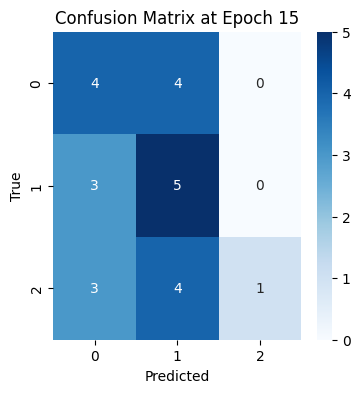

1/1 [==============================] - 0s 99ms/step
Epoch 20 Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       1.00      0.25      0.40         8
    overripe       0.36      1.00      0.53         8

    accuracy                           0.42        24
   macro avg       0.45      0.42      0.31        24
weighted avg       0.45      0.42      0.31        24



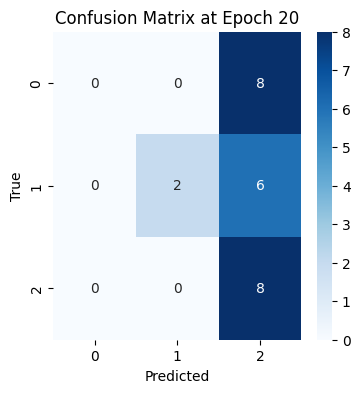

1/1 [==============================] - 0s 72ms/step
Epoch 25 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.29      0.62      0.40         8
    overripe       0.50      0.38      0.43         8

    accuracy                           0.33        24
   macro avg       0.26      0.33      0.28        24
weighted avg       0.26      0.33      0.28        24



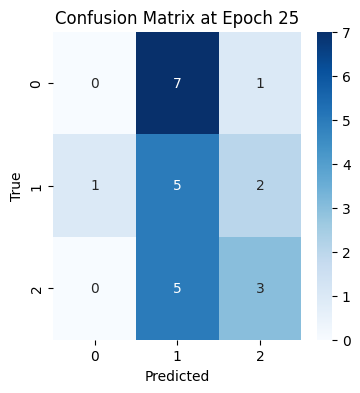

1/1 [==============================] - 0s 78ms/step
Epoch 30 Accuracy: 0.2916666666666667
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.29      0.75      0.41         8
    overripe       0.33      0.12      0.18         8

    accuracy                           0.29        24
   macro avg       0.21      0.29      0.20        24
weighted avg       0.21      0.29      0.20        24



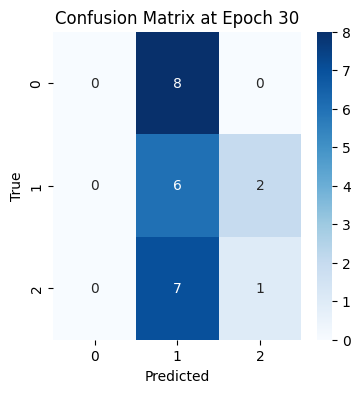

1/1 [==============================] - 0s 79ms/step
Epoch 35 Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.67      0.25      0.36         8
    overripe       0.38      1.00      0.55         8

    accuracy                           0.42        24
   macro avg       0.35      0.42      0.31        24
weighted avg       0.35      0.42      0.31        24



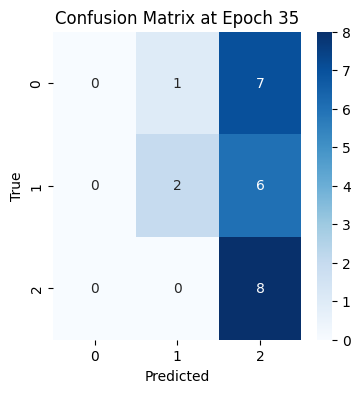

1/1 [==============================] - 0s 79ms/step
Epoch 40 Accuracy: 0.375
              precision    recall  f1-score   support

      unripe       0.50      1.00      0.67         8
     perfect       0.14      0.12      0.13         8
    overripe       0.00      0.00      0.00         8

    accuracy                           0.38        24
   macro avg       0.21      0.38      0.27        24
weighted avg       0.21      0.38      0.27        24



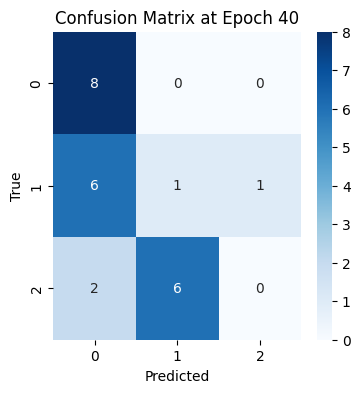

1/1 [==============================] - 0s 81ms/step
Epoch 45 Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

      unripe       0.62      0.62      0.62         8
     perfect       0.31      0.62      0.42         8
    overripe       0.00      0.00      0.00         8

    accuracy                           0.42        24
   macro avg       0.31      0.42      0.35        24
weighted avg       0.31      0.42      0.35        24



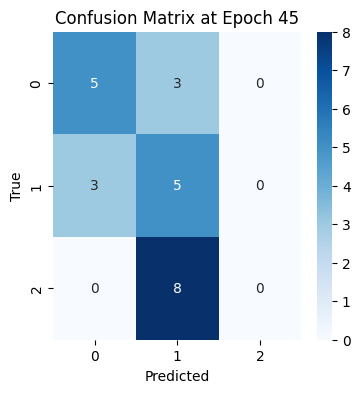

1/1 [==============================] - 0s 77ms/step
Epoch 50 Accuracy: 0.5416666666666666
              precision    recall  f1-score   support

      unripe       0.50      0.12      0.20         8
     perfect       0.40      0.75      0.52         8
    overripe       0.86      0.75      0.80         8

    accuracy                           0.54        24
   macro avg       0.59      0.54      0.51        24
weighted avg       0.59      0.54      0.51        24



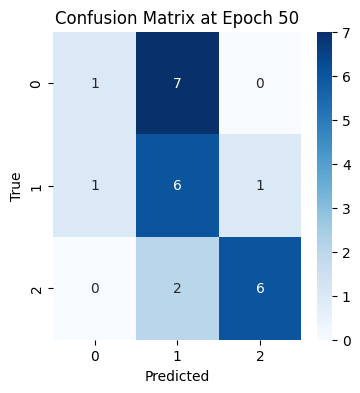

1/1 [==============================] - 0s 74ms/step
Epoch 55 Accuracy: 0.5416666666666666
              precision    recall  f1-score   support

      unripe       0.60      0.38      0.46         8
     perfect       0.50      0.38      0.43         8
    overripe       0.54      0.88      0.67         8

    accuracy                           0.54        24
   macro avg       0.55      0.54      0.52        24
weighted avg       0.55      0.54      0.52        24



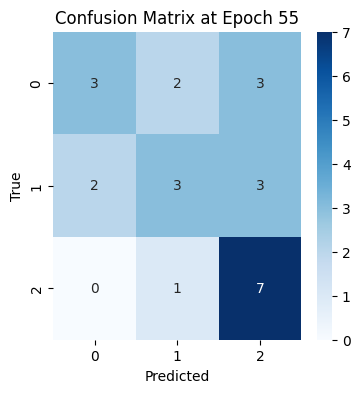

1/1 [==============================] - 0s 73ms/step
Epoch 60 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.50      0.25      0.33         8
     perfect       0.30      0.75      0.43         8
    overripe       0.00      0.00      0.00         8

    accuracy                           0.33        24
   macro avg       0.27      0.33      0.25        24
weighted avg       0.27      0.33      0.25        24



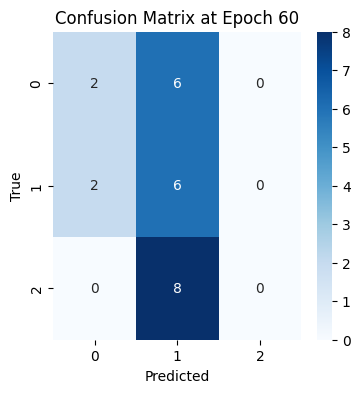

1/1 [==============================] - 0s 113ms/step
Epoch 65 Accuracy: 0.5
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.50      0.62      0.56         8
    overripe       0.50      0.88      0.64         8

    accuracy                           0.50        24
   macro avg       0.33      0.50      0.40        24
weighted avg       0.33      0.50      0.40        24



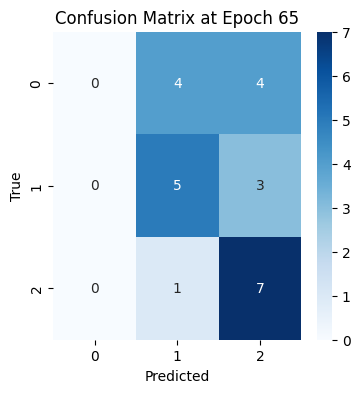

1/1 [==============================] - 0s 100ms/step
Epoch 70 Accuracy: 0.375
              precision    recall  f1-score   support

      unripe       0.50      0.25      0.33         8
     perfect       0.35      0.88      0.50         8
    overripe       0.00      0.00      0.00         8

    accuracy                           0.38        24
   macro avg       0.28      0.38      0.28        24
weighted avg       0.28      0.38      0.28        24



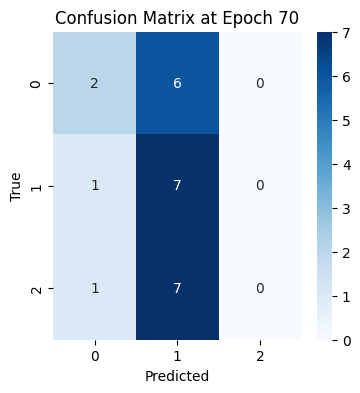

1/1 [==============================] - 0s 76ms/step
Epoch 75 Accuracy: 0.375
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       1.00      0.12      0.22         8
    overripe       0.35      1.00      0.52         8

    accuracy                           0.38        24
   macro avg       0.45      0.38      0.25        24
weighted avg       0.45      0.38      0.25        24



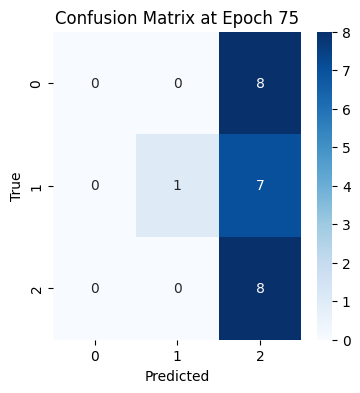

1/1 [==============================] - 0s 69ms/step
Epoch 80 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.33      1.00      0.50         8
    overripe       0.00      0.00      0.00         8

    accuracy                           0.33        24
   macro avg       0.11      0.33      0.17        24
weighted avg       0.11      0.33      0.17        24



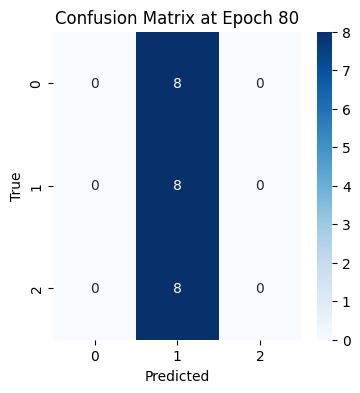

1/1 [==============================] - 0s 79ms/step
Epoch 85 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.00      0.00      0.00         8
    overripe       0.33      1.00      0.50         8

    accuracy                           0.33        24
   macro avg       0.11      0.33      0.17        24
weighted avg       0.11      0.33      0.17        24



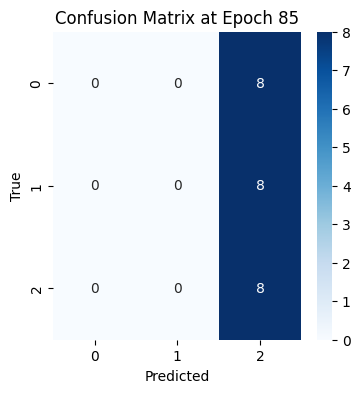

1/1 [==============================] - 0s 87ms/step
Epoch 90 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.00      0.00      0.00         8
    overripe       0.33      1.00      0.50         8

    accuracy                           0.33        24
   macro avg       0.11      0.33      0.17        24
weighted avg       0.11      0.33      0.17        24



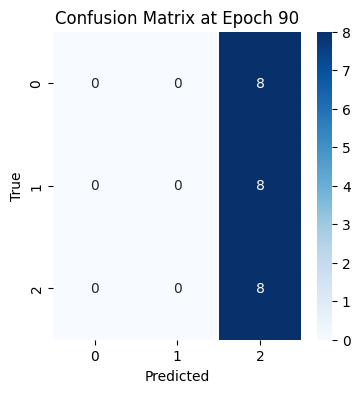

1/1 [==============================] - 0s 125ms/step
Epoch 95 Accuracy: 0.4583333333333333
              precision    recall  f1-score   support

      unripe       0.50      0.12      0.20         8
     perfect       0.37      0.88      0.52         8
    overripe       1.00      0.38      0.55         8

    accuracy                           0.46        24
   macro avg       0.62      0.46      0.42        24
weighted avg       0.62      0.46      0.42        24



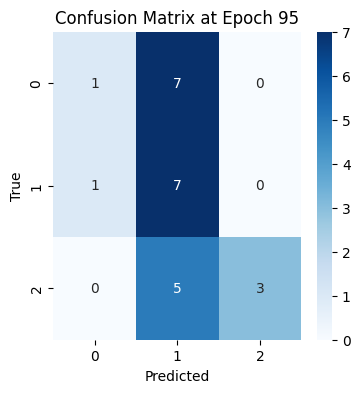

1/1 [==============================] - 0s 67ms/step
Epoch 100 Accuracy: 0.2916666666666667
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         8
     perfect       0.29      0.50      0.36         8
    overripe       0.30      0.38      0.33         8

    accuracy                           0.29        24
   macro avg       0.20      0.29      0.23        24
weighted avg       0.20      0.29      0.23        24



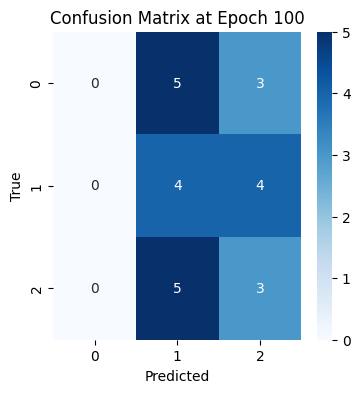

In [17]:
x, y = test_kiwi_VIS_datagen.__getitem__(0)
y = y.numpy()

for i in range(5,101,5): 
    kiwi_vis_model.load_weights(working_dir + 'KIWI_VIS_HS_CNN_checkpoints/HS_CNN' + str(i).zfill(4) + '.ckpt')
    y_pred = kiwi_vis_model.predict(x)
    y_pred = np.argmax(y_pred, axis=1)
    print(f"Epoch {i} Accuracy: {np.mean(y_pred == y)}")
    # print recall and precision and f1 score 
    print(classification_report(y, y_pred, target_names=ripeness_state_dict.keys(), zero_division=0))
    # plot confusion matrix 
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix at Epoch {i}')
    plt.show()

#### NIR

In [18]:
test_kiwi_NIR = test_df[(test_df['camera_type'] == 'NIR') & (test_df['fruit'] == 'Kiwi')]
test_kiwi_NIR_datagen = HSI_datagen(test_kiwi_NIR, 'header_file', 'data_file', {'name': 'ripeness_state_y', 'type': int}, batch_size=len(test_kiwi_NIR), target_size=(64, 64), data_dir=data_dir, 
                           shuffle=True, normalize=False, augment= False, augmentConfig=augConfig, balance=True)

In [19]:
kiwi_nir_model = build_HS_CNN((64,64,252))

1/1 [==============================] - 0s 158ms/step
Epoch 5 Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

      unripe       0.43      1.00      0.60         3
     perfect       1.00      0.67      0.80         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.56         9
   macro avg       0.48      0.56      0.47         9
weighted avg       0.48      0.56      0.47         9



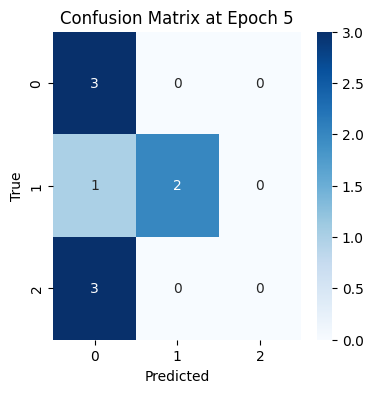

1/1 [==============================] - 0s 41ms/step
Epoch 10 Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

      unripe       0.60      1.00      0.75         3
     perfect       1.00      0.33      0.50         3
    overripe       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.64      0.56      0.53         9
weighted avg       0.64      0.56      0.53         9



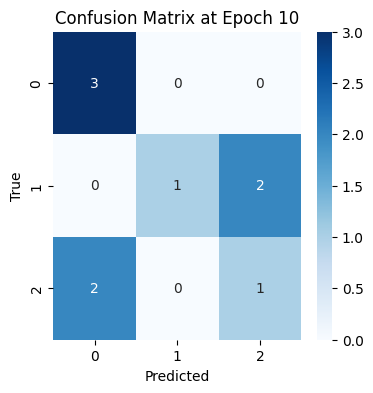

1/1 [==============================] - 0s 41ms/step
Epoch 15 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.38      1.00      0.55         3
     perfect       1.00      0.33      0.50         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.46      0.44      0.35         9
weighted avg       0.46      0.44      0.35         9



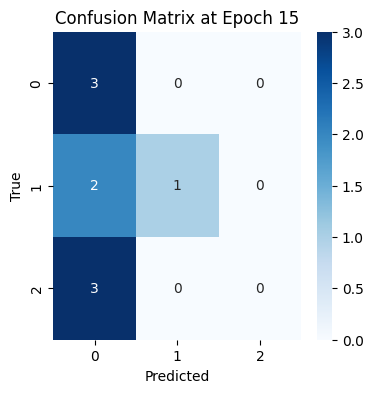

1/1 [==============================] - 0s 44ms/step
Epoch 20 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.38      1.00      0.55         3
     perfect       0.00      0.00      0.00         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.12      0.33      0.18         9
weighted avg       0.12      0.33      0.18         9



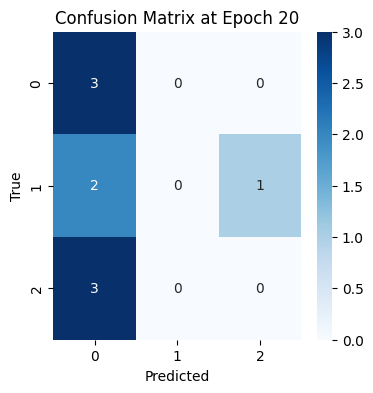

1/1 [==============================] - 0s 41ms/step
Epoch 25 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.50      1.00      0.67         3
     perfect       0.50      0.33      0.40         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.33      0.44      0.36         9
weighted avg       0.33      0.44      0.36         9



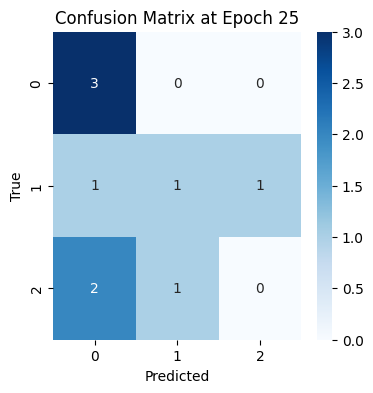

1/1 [==============================] - 0s 41ms/step
Epoch 30 Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

      unripe       0.60      1.00      0.75         3
     perfect       0.75      1.00      0.86         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.45      0.67      0.54         9
weighted avg       0.45      0.67      0.54         9



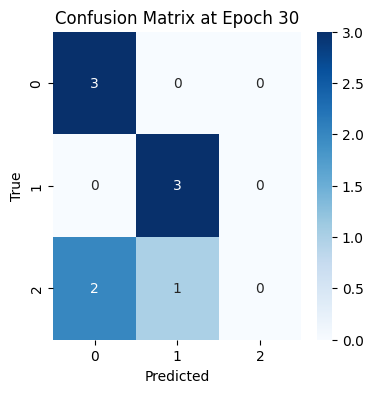

1/1 [==============================] - 0s 49ms/step
Epoch 35 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.50      1.00      0.67         3
     perfect       0.50      0.33      0.40         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.33      0.44      0.36         9
weighted avg       0.33      0.44      0.36         9



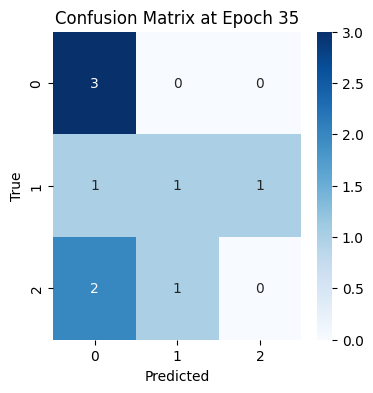

1/1 [==============================] - 0s 42ms/step
Epoch 40 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.33      1.00      0.50         3
     perfect       0.00      0.00      0.00         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.11      0.33      0.17         9
weighted avg       0.11      0.33      0.17         9



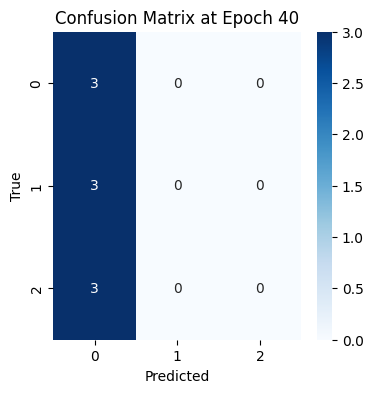

1/1 [==============================] - 0s 41ms/step
Epoch 45 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.67      0.67      0.67         3
     perfect       0.25      0.33      0.29         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.31      0.33      0.32         9
weighted avg       0.31      0.33      0.32         9



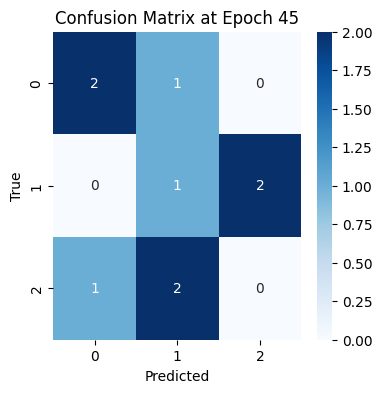

1/1 [==============================] - 0s 46ms/step
Epoch 50 Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

      unripe       0.67      0.67      0.67         3
     perfect       1.00      0.33      0.50         3
    overripe       0.40      0.67      0.50         3

    accuracy                           0.56         9
   macro avg       0.69      0.56      0.56         9
weighted avg       0.69      0.56      0.56         9



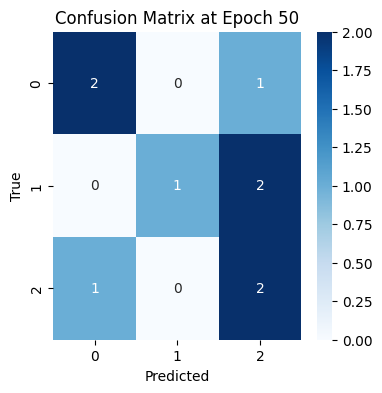

1/1 [==============================] - 0s 41ms/step
Epoch 55 Accuracy: 0.2222222222222222
              precision    recall  f1-score   support

      unripe       0.50      0.33      0.40         3
     perfect       0.00      0.00      0.00         3
    overripe       0.20      0.33      0.25         3

    accuracy                           0.22         9
   macro avg       0.23      0.22      0.22         9
weighted avg       0.23      0.22      0.22         9



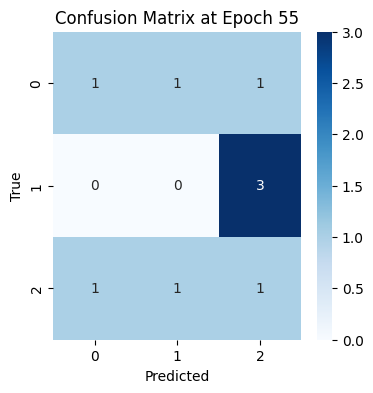

1/1 [==============================] - 0s 41ms/step
Epoch 60 Accuracy: 0.2222222222222222
              precision    recall  f1-score   support

      unripe       0.50      0.33      0.40         3
     perfect       0.25      0.33      0.29         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.22         9
   macro avg       0.25      0.22      0.23         9
weighted avg       0.25      0.22      0.23         9



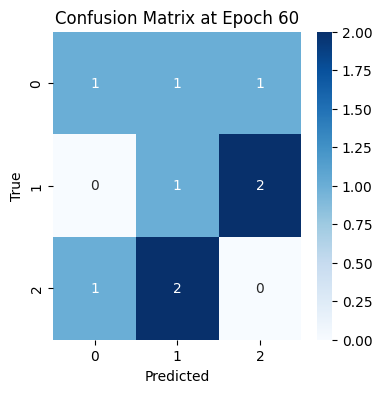

1/1 [==============================] - 0s 40ms/step
Epoch 65 Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

      unripe       0.50      1.00      0.67         3
     perfect       0.67      0.67      0.67         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.56         9
   macro avg       0.39      0.56      0.44         9
weighted avg       0.39      0.56      0.44         9



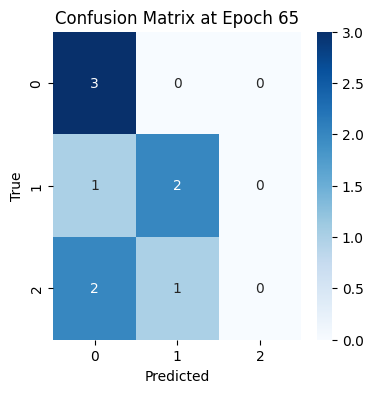

1/1 [==============================] - 0s 44ms/step
Epoch 70 Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

      unripe       0.50      1.00      0.67         3
     perfect       1.00      0.33      0.50         3
    overripe       0.50      0.33      0.40         3

    accuracy                           0.56         9
   macro avg       0.67      0.56      0.52         9
weighted avg       0.67      0.56      0.52         9



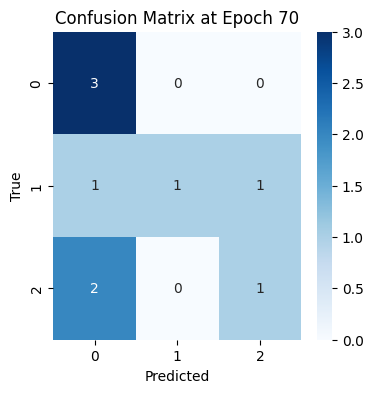

1/1 [==============================] - 0s 45ms/step
Epoch 75 Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

      unripe       0.75      1.00      0.86         3
     perfect       0.75      1.00      0.86         3
    overripe       1.00      0.33      0.50         3

    accuracy                           0.78         9
   macro avg       0.83      0.78      0.74         9
weighted avg       0.83      0.78      0.74         9



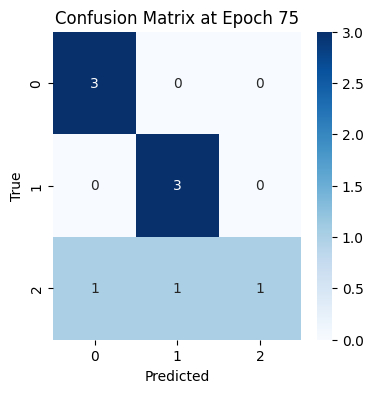

1/1 [==============================] - 0s 41ms/step
Epoch 80 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.50      0.33      0.40         3
     perfect       0.43      1.00      0.60         3
    overripe       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.31      0.44      0.33         9
weighted avg       0.31      0.44      0.33         9



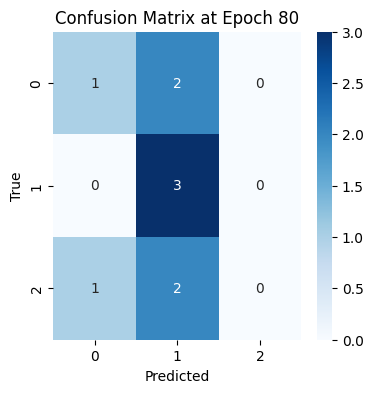

1/1 [==============================] - 0s 41ms/step
Epoch 85 Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

      unripe       0.50      1.00      0.67         3
     perfect       1.00      0.33      0.50         3
    overripe       0.50      0.33      0.40         3

    accuracy                           0.56         9
   macro avg       0.67      0.56      0.52         9
weighted avg       0.67      0.56      0.52         9



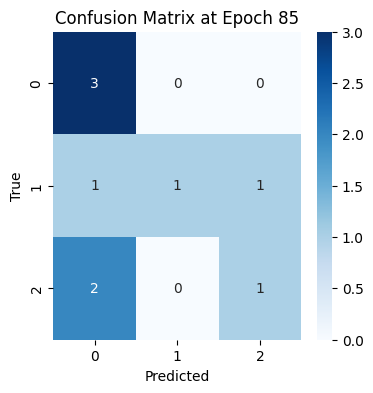

1/1 [==============================] - 0s 41ms/step
Epoch 90 Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

      unripe       0.00      0.00      0.00         3
     perfect       0.00      0.00      0.00         3
    overripe       0.43      1.00      0.60         3

    accuracy                           0.33         9
   macro avg       0.14      0.33      0.20         9
weighted avg       0.14      0.33      0.20         9



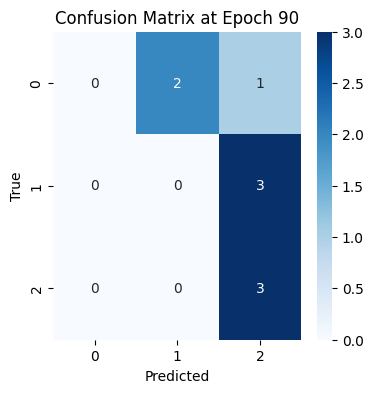

1/1 [==============================] - 0s 41ms/step
Epoch 95 Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

      unripe       0.43      1.00      0.60         3
     perfect       0.00      0.00      0.00         3
    overripe       0.50      0.33      0.40         3

    accuracy                           0.44         9
   macro avg       0.31      0.44      0.33         9
weighted avg       0.31      0.44      0.33         9



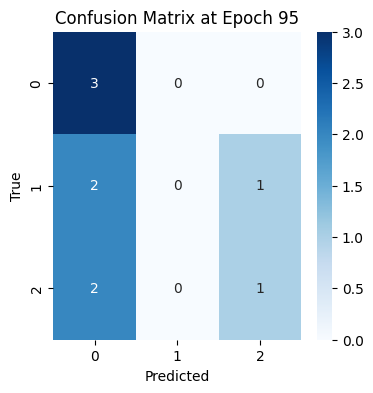

1/1 [==============================] - 0s 42ms/step
Epoch 100 Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

      unripe       0.50      1.00      0.67         3
     perfect       1.00      0.67      0.80         3
    overripe       1.00      0.33      0.50         3

    accuracy                           0.67         9
   macro avg       0.83      0.67      0.66         9
weighted avg       0.83      0.67      0.66         9



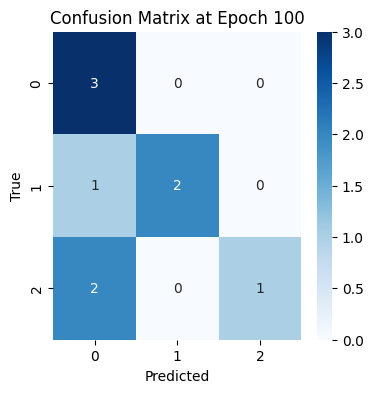

In [20]:
x, y = test_kiwi_NIR_datagen.__getitem__(0)   
y = y.numpy()
for i in range(5,101,5): 
    kiwi_nir_model.load_weights(working_dir + 'KIWI_NIR_HS_CNN_checkpoints_prev/HS_CNN' + str(i).zfill(4) + '.ckpt')
    y_pred = kiwi_nir_model.predict(x)
    y_pred = np.argmax(y_pred, axis=1)
    print(f"Epoch {i} Accuracy: {np.mean(y_pred == y)}")
    # print recall and precision and f1 score 
    print(classification_report(y, y_pred, target_names=ripeness_state_dict.keys(), zero_division=0))
    # plot confusion matrix 
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix at Epoch {i}')
    plt.show()